In [1]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

# cheese-maze-1 and cheese-maze 2 run with exploration=0.1, cheese value = default, ct-depth=256, horizon=16.
# cheese-maze 3: explore = 0.99, explore_decay = 0.999, cheese value = 100, ct-depth=256,horizon=16.
# cheese-maze 4: explore = 0.99, explore_decay = 0.999, cheese value = 10, ct-depth=128, horizon = 16.
data = pd.read_csv('../logs/cheesemaze-yadu-1.csv',sep=', ',engine='python')
print data.tail()

       global_cycle  cycle  observation  reward  action explore_on explored  \
10158         10158    248           12       0       3          0        0   
10159         10159    249           10       9       3          0        0   
10160         10160    250            8       9       2          0        0   
10161         10161    251            5       9       2          0        0   
10162         10162    252            7      20       0    endgame  endgame   

      explore_rate_g  total reward  average reward  
10158          0.999          1063         4.26908  
10159          0.999          1072         4.28800  
10160          0.999          1081         4.30677  
10161          0.999          1090         4.32540  
10162        endgame          1110         4.40476  


In [ ]:
df = data[['global_cycle','explore_on','average reward']]
for i, row in df.iterrows():
    if row['explore_on']=='endgame':
        df.ix[i,'explore_on'] = -1
    elif df.ix[i,'explore_on'] == '1':
        df.ix[i,'explore_on'] = 1
    else:
        df.ix[i,'explore_on'] = 0
        

In [ ]:
dat = np.array(df)
print dat

In [5]:
# get cycles per episode, average reward per episode

reward_offset = dict()
reward_offset["cheese-maze"] = 10

cycles = np.array(data[['cycle']])
rewards = np.array(data[['total reward']])
for i in xrange(len(rewards)):
    rewards[i] -= cycles[i]*reward_offset["cheese-maze"]
episode_lengths = list()
average_rewards = list()
for i in xrange(len(cycles)):
    if i==1:
        continue
    if cycles[i,0]==1:
        episode_lengths.append(cycles[i-1])
        average_rewards.append(float(rewards[i-1])/cycles[i-1])

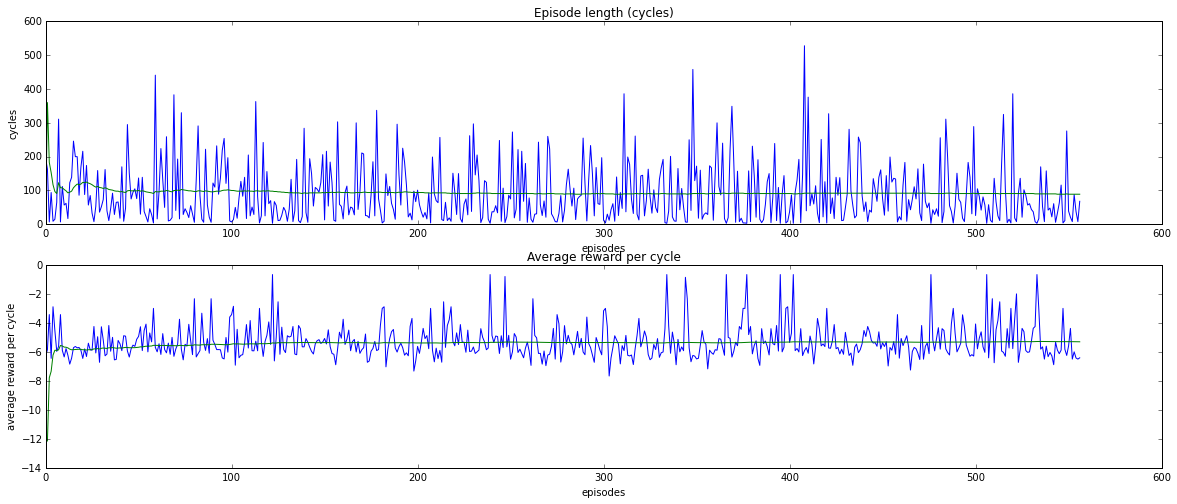

In [6]:
cs = np.cumsum(np.array(average_rewards))

for i in xrange(len(cs)):
    cs[i]/=i
fig = plt.figure(figsize=(20,8))

cs2 = np.cumsum(np.array(episode_lengths))
for i in xrange(len(cs2)):
    cs2[i]/=i

ax = fig.add_subplot(211)
ax.set_title('Episode length (cycles)')
ax.set_xlabel('episodes')
ax.set_ylabel('cycles')
ax.plot(episode_lengths,label="Test")
ax.plot(cs2,label="Test")

ax = fig.add_subplot(212)
ax.set_title('Average reward per cycle')
ax.set_ylabel('average reward per cycle')
ax.set_xlabel('episodes')
ax.plot(average_rewards,label="Test")
ax.plot(cs,label="Test")
#plt.legend(loc='upper left')
plt.show()